# Harris corner detector

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os

## OpenCV

In [4]:
img_path = os.path.join('..', '..', 'pics', 'pic.jpg')
img = cv.imread(img_path)
gray =cv.cvtColor(img, cv.COLOR_BGR2GRAY)

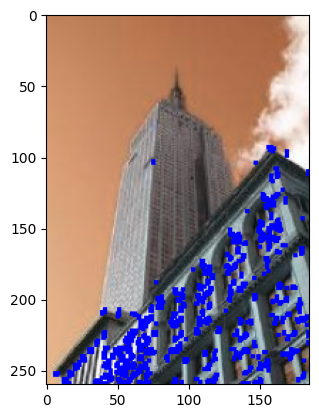

In [7]:
gray = np.float32(gray)
dst = cv.cornerHarris(gray, 2, 3, 0.04)
 
#result is dilated for marking the corners, not important
dst = cv.dilate(dst,None)
 
# Threshold for an optimal value, it may vary depending on the image.
img[dst > 0.01*dst.max()] = [0, 0, 255]
plt.imshow(img)

## Corner with SubPixel Accuracy

In [ ]:
dst = cv.cornerHarris(gray,2,3,0.04)
dst = cv.dilate(dst,None)
ret, dst = cv.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)
 
# find centroids
ret, labels, stats, centroids = cv.connectedComponentsWithStats(dst)
 
# define the criteria to stop and refine the corners
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)
 
# Now draw them
res = np.hstack((centroids,corners))
res = np.int0(res)
img[res[:,1],res[:,0]]=[0,0,255]
img[res[:,3],res[:,2]] = [0,255,0]